In [23]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from web3 import Web3

In [9]:
pool_addresses = [
    '0x45dDa9cb7c25131DF268515131f647d726f50608', # USDC-WETH 1%
    '0xA374094527e1673A86dE625aa59517c5dE346d32', # USDC-MATIC 0.05%
    '0x50eaEDB835021E4A108B7290636d62E9765cc6d7', # ETH-BTC 0.05%
    '0x167384319B41F7094e62f7506409Eb38079AbfF8', # ETH-MATIC 0.3%
    '0x5645dCB64c059aa11212707fbf4E7F984440a8Cf', # USDC-DAI 0.01%
    '0xDaC8A8E6DBf8c690ec6815e0fF03491B2770255D', # USDC-USDT 0.01%
    '0x0a63D3910fFC1529190e80E10855c4216407cc45', # USDC-BOB 0.01%
]

In [10]:
provider = Web3.HTTPProvider('https://polygon-mainnet.g.alchemy.com/v2/59wtBsqykT4QLLVCrXLifvVFJMqO8jPO')
w3 = Web3(provider)

In [15]:
with open('poolAbi.json', 'r') as file:
    abi = file.read()
    
pools = [w3.eth.contract(address=address, abi=abi) for address in pool_addresses]

In [16]:
last_block = 41757376

In [29]:
collected = defaultdict(list)

for i in tqdm(range(50)):
    for pool in pools:
        collected[pool.address].append(pool.functions.slot0().call(block_identifier=last_block - i)[1])

  0%|          | 0/50 [00:00<?, ?it/s]

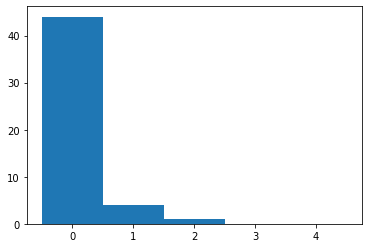

In [34]:
idx = 0
plt.hist(np.abs(np.diff(collected[pools[idx].address])), bins=[-.5, .5, 1.5, 2.5, 3.5, 4.5]);

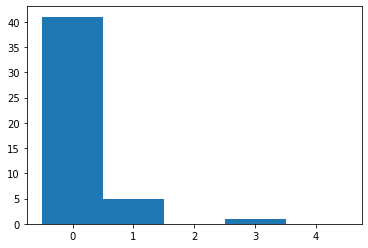

In [35]:
idx = 1
plt.hist(np.abs(np.diff(collected[pools[idx].address])), bins=[-.5, .5, 1.5, 2.5, 3.5, 4.5]);

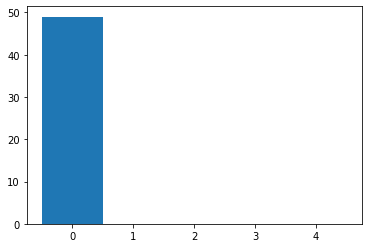

In [36]:
idx = 2
plt.hist(np.abs(np.diff(collected[pools[idx].address])), bins=[-.5, .5, 1.5, 2.5, 3.5, 4.5]);

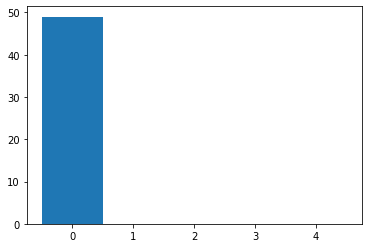

In [37]:
idx = 3
plt.hist(np.abs(np.diff(collected[pools[idx].address])), bins=[-.5, .5, 1.5, 2.5, 3.5, 4.5]);

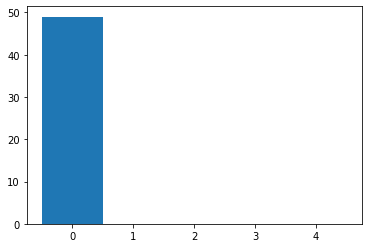

In [38]:
idx = 4
plt.hist(np.abs(np.diff(collected[pools[idx].address])), bins=[-.5, .5, 1.5, 2.5, 3.5, 4.5]);

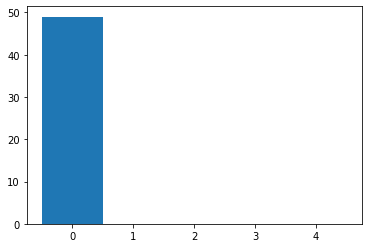

In [39]:
idx = 5
plt.hist(np.abs(np.diff(collected[pools[idx].address])), bins=[-.5, .5, 1.5, 2.5, 3.5, 4.5]);

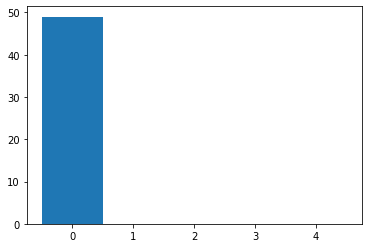

In [40]:
idx = 6
plt.hist(np.abs(np.diff(collected[pools[idx].address])), bins=[-.5, .5, 1.5, 2.5, 3.5, 4.5]);

So, as you can see the first 2 pools `USDC / WETH` and `USDC / MATIC` are quite volatile, so min width for them should be 100, while others they should be 0.